# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that
company. Businesses are very keen on measuring churn because keeping an
existing customer is far less expensive than acquiring a new customer. New
business involves working leads through a sales funnel, using marketing and
sales budgets to gain additional customers. Existing customers will often have a
higher volume of service consumption and can generate additional customer
referrals.

Customer retention can be achieved with good customer service and products.
But the most effective way for a company to prevent attrition of customers is to
truly know them. The vast volumes of data collected about customers can be
used to build churn prediction models. Knowing who is most likely to defect
means that a company can prioritise focused marketing efforts on that subset of
their customer base.

Preventing customer churn is critically important to the telecommunications
sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of
building and comparing several customer churn prediction models.

In [2]:
# Importing important libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading Data

df = pd.read_csv("Telecom_customer_churn.csv")

In [4]:
# checking top 5 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking shape of the data
df.shape

(7043, 21)

In [6]:
# checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#checking null values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking the data data type wise

df.dtypes[df.dtypes == 'int64']

SeniorCitizen    int64
tenure           int64
dtype: object

In [9]:
df.dtypes[df.dtypes == 'object']

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [10]:
df['TotalCharges'].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# removinf unwanted space in data

df['TotalCharges'] = df['TotalCharges'].str.strip()

In [13]:
# converting into numerical 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# after converting  into numarical and removed unwanted space, again checking information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


After removing the unwanted space, we found there is null values in TotalCharges columns. lets fill it

In [15]:
# we have tenure and monthly charges, lets fill the nan values using these columns

df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'])

In [16]:
#After filling NAN value, checking again 

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# let's identify binary columns

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# let's identify multi-category columns
multi_category_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod']

In [18]:
#importing Label Encode to encode the object data type

from sklearn.preprocessing import LabelEncoder

In [19]:
# Encoding 

le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
# encoding multi-category columns

df = pd.get_dummies(df, columns=multi_category_cols, dtype=float)

In [21]:
# After encoding, checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

# Visualize the data

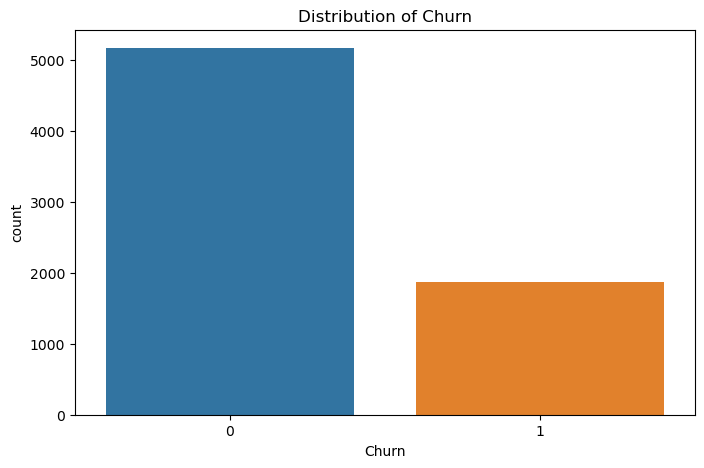

In [22]:
#Distribution of the target variable ('Churn')

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()


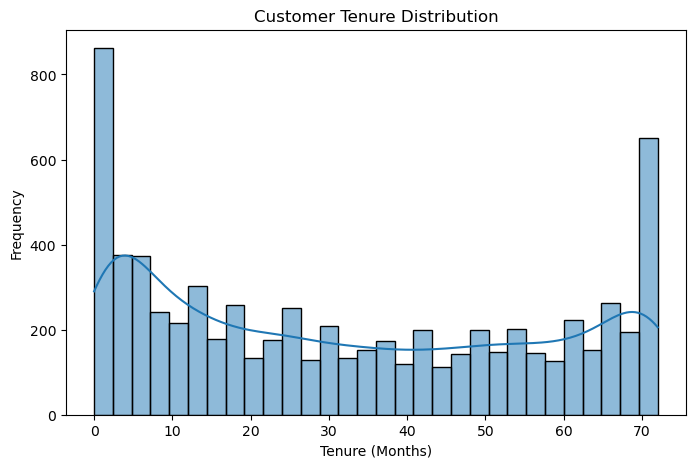

In [23]:
#Customer tenure distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

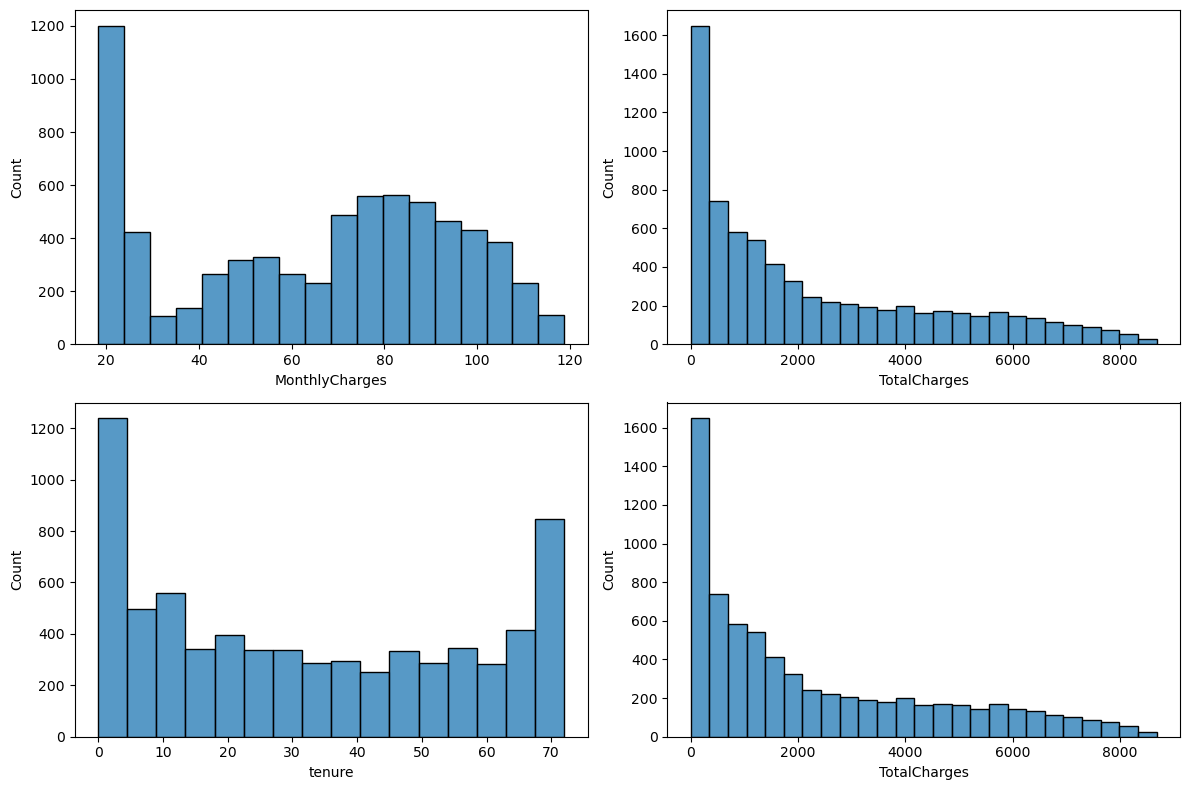

In [24]:
#Distribution of Continuous Variables

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['MonthlyCharges'], ax=axs[0, 0])
sns.histplot(df['TotalCharges'], ax=axs[0, 1])
sns.histplot(df['tenure'], ax=axs[1, 0])
sns.histplot(df['TotalCharges'], ax=axs[1, 1])
plt.tight_layout()
plt.show()

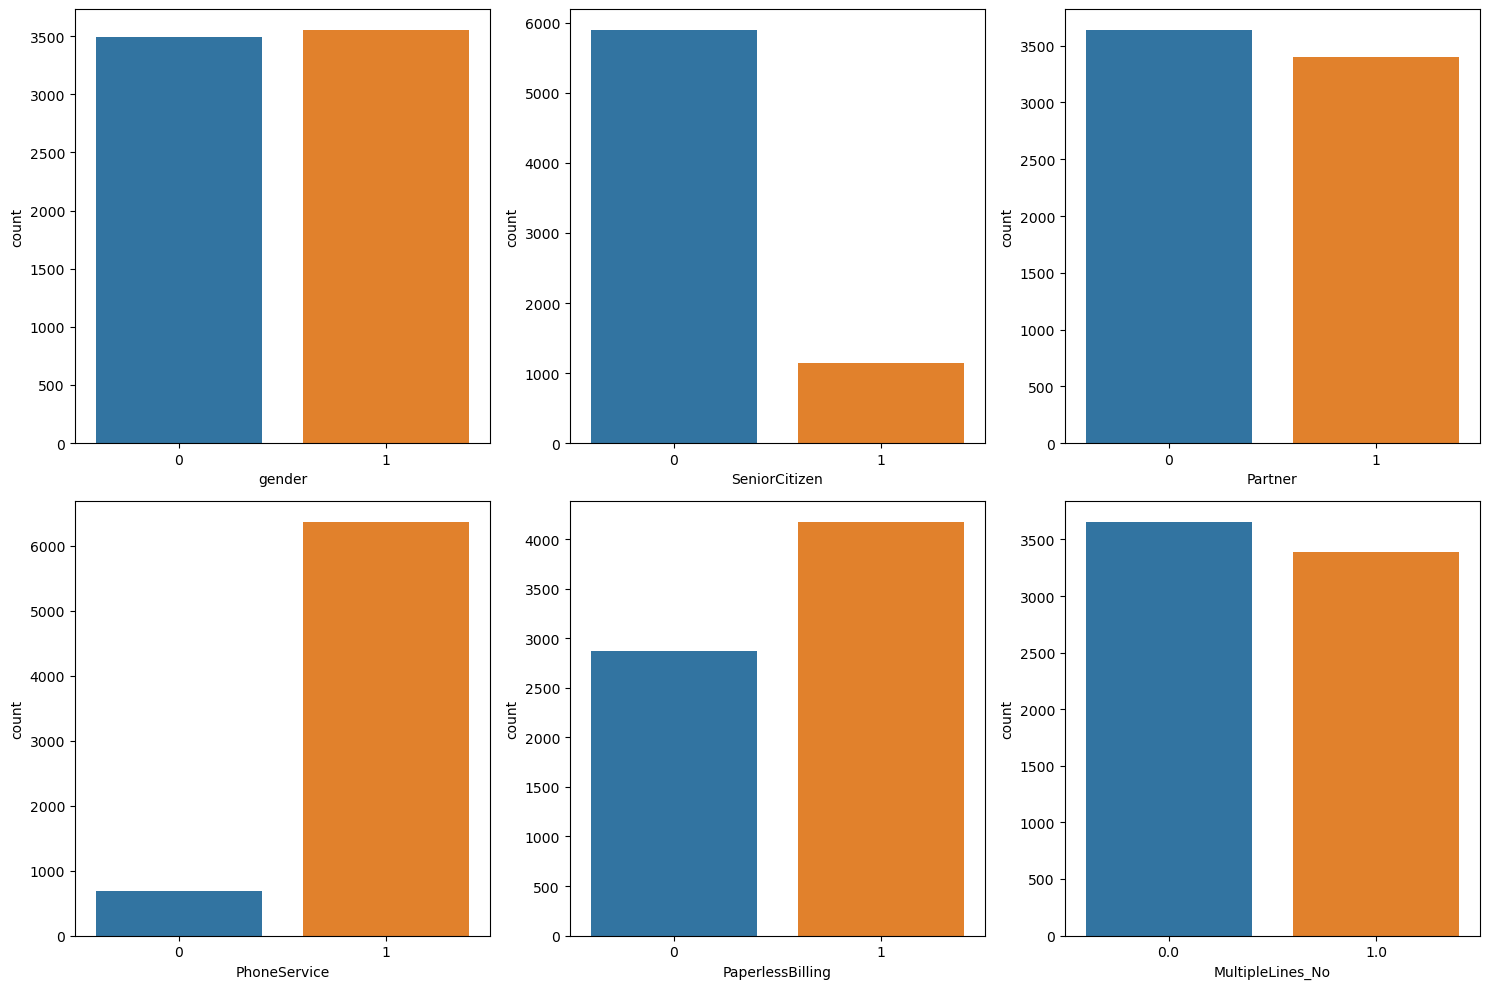

In [25]:
# Bar Plot for Categorical Variables

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='gender', data=df, ax=axs[0, 0])
sns.countplot(x='SeniorCitizen', data=df, ax=axs[0, 1])
sns.countplot(x='Partner', data=df, ax=axs[0, 2])
sns.countplot(x='PhoneService', data=df, ax=axs[1, 0])
sns.countplot(x='PaperlessBilling', data=df, ax=axs[1, 1])
sns.countplot(x='MultipleLines_No', data=df, ax=axs[1, 2])
plt.tight_layout()
plt.show()

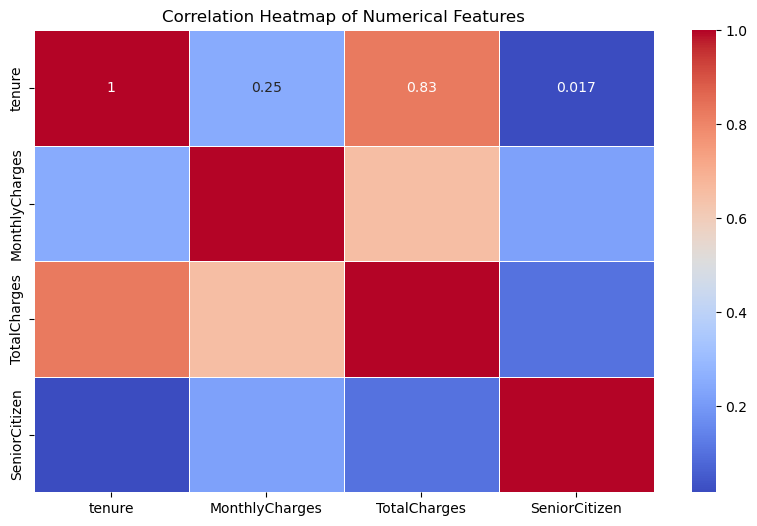

In [26]:
#Correlation heatmap of numerical variables
plt.figure(figsize=(10, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


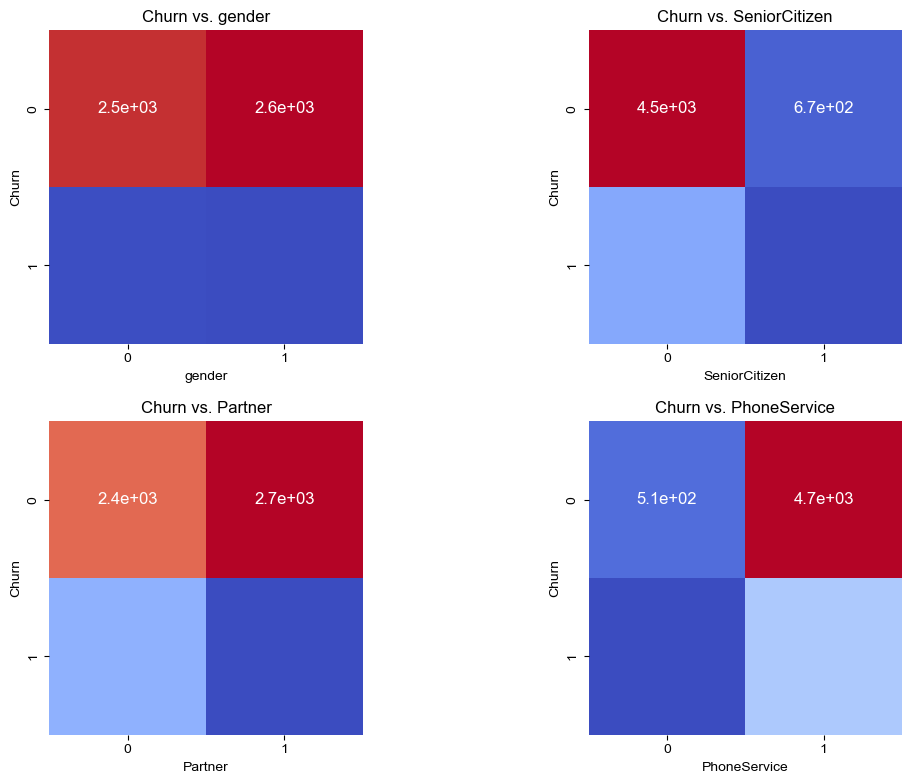

In [27]:
#  Heatmap for categorical variables

def plot_churn_subplots(df, columns, rows=2, cols=2):
   
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Adjust figure size as needed
    sns.set()

    for i, ax in enumerate(axes.flatten()):
        if i < len(columns):
            sns.heatmap(
                pd.crosstab(df['Churn'], df[columns[i]]),
                annot=True,
                cmap='coolwarm',
                fmt='.2g',
                square=True,
                cbar=False,
                ax=ax
            )
            ax.set_title(f'Churn vs. {columns[i]}')

    plt.tight_layout()  # Improve spacing between subplots
    plt.show()

# Example usage:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'PhoneService']
plot_churn_subplots(df, columns_to_plot)

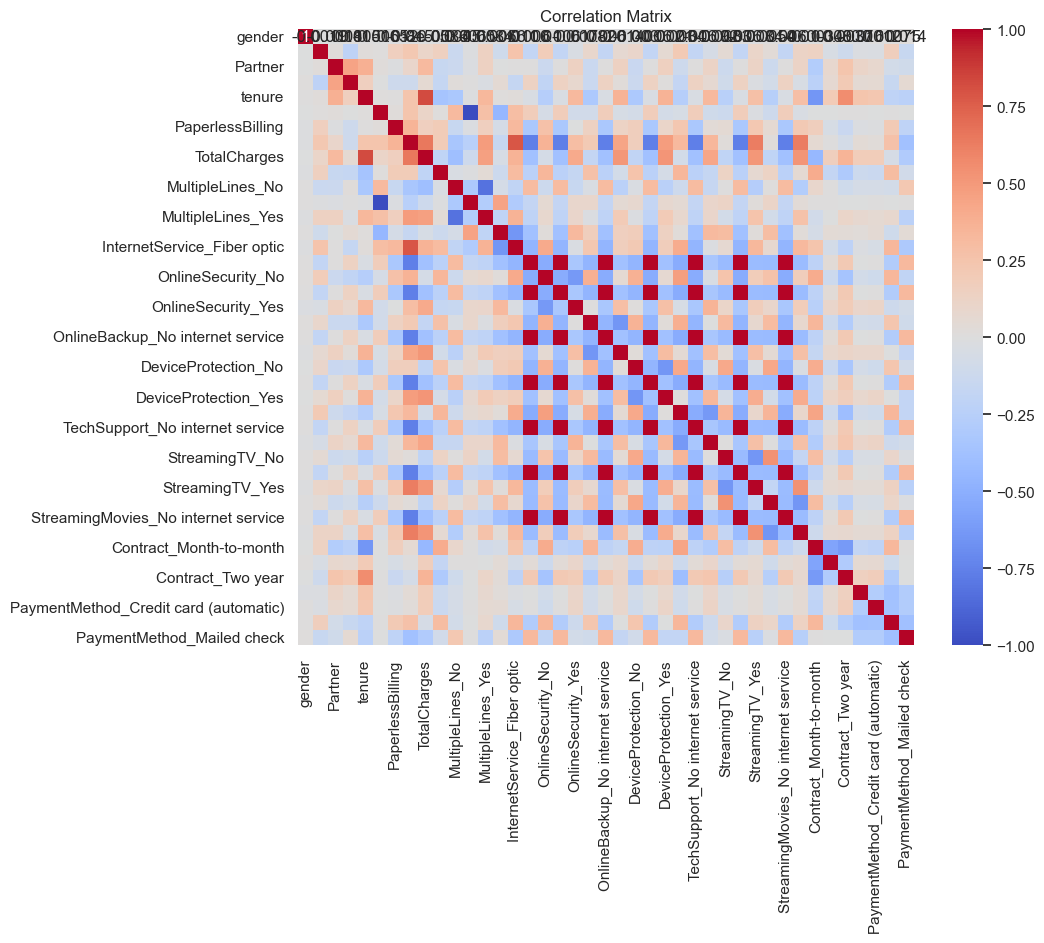

In [28]:
# heat map for all the variable

corr_matrix = df.drop(columns = 'customerID').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<Figure size 896x672 with 0 Axes>

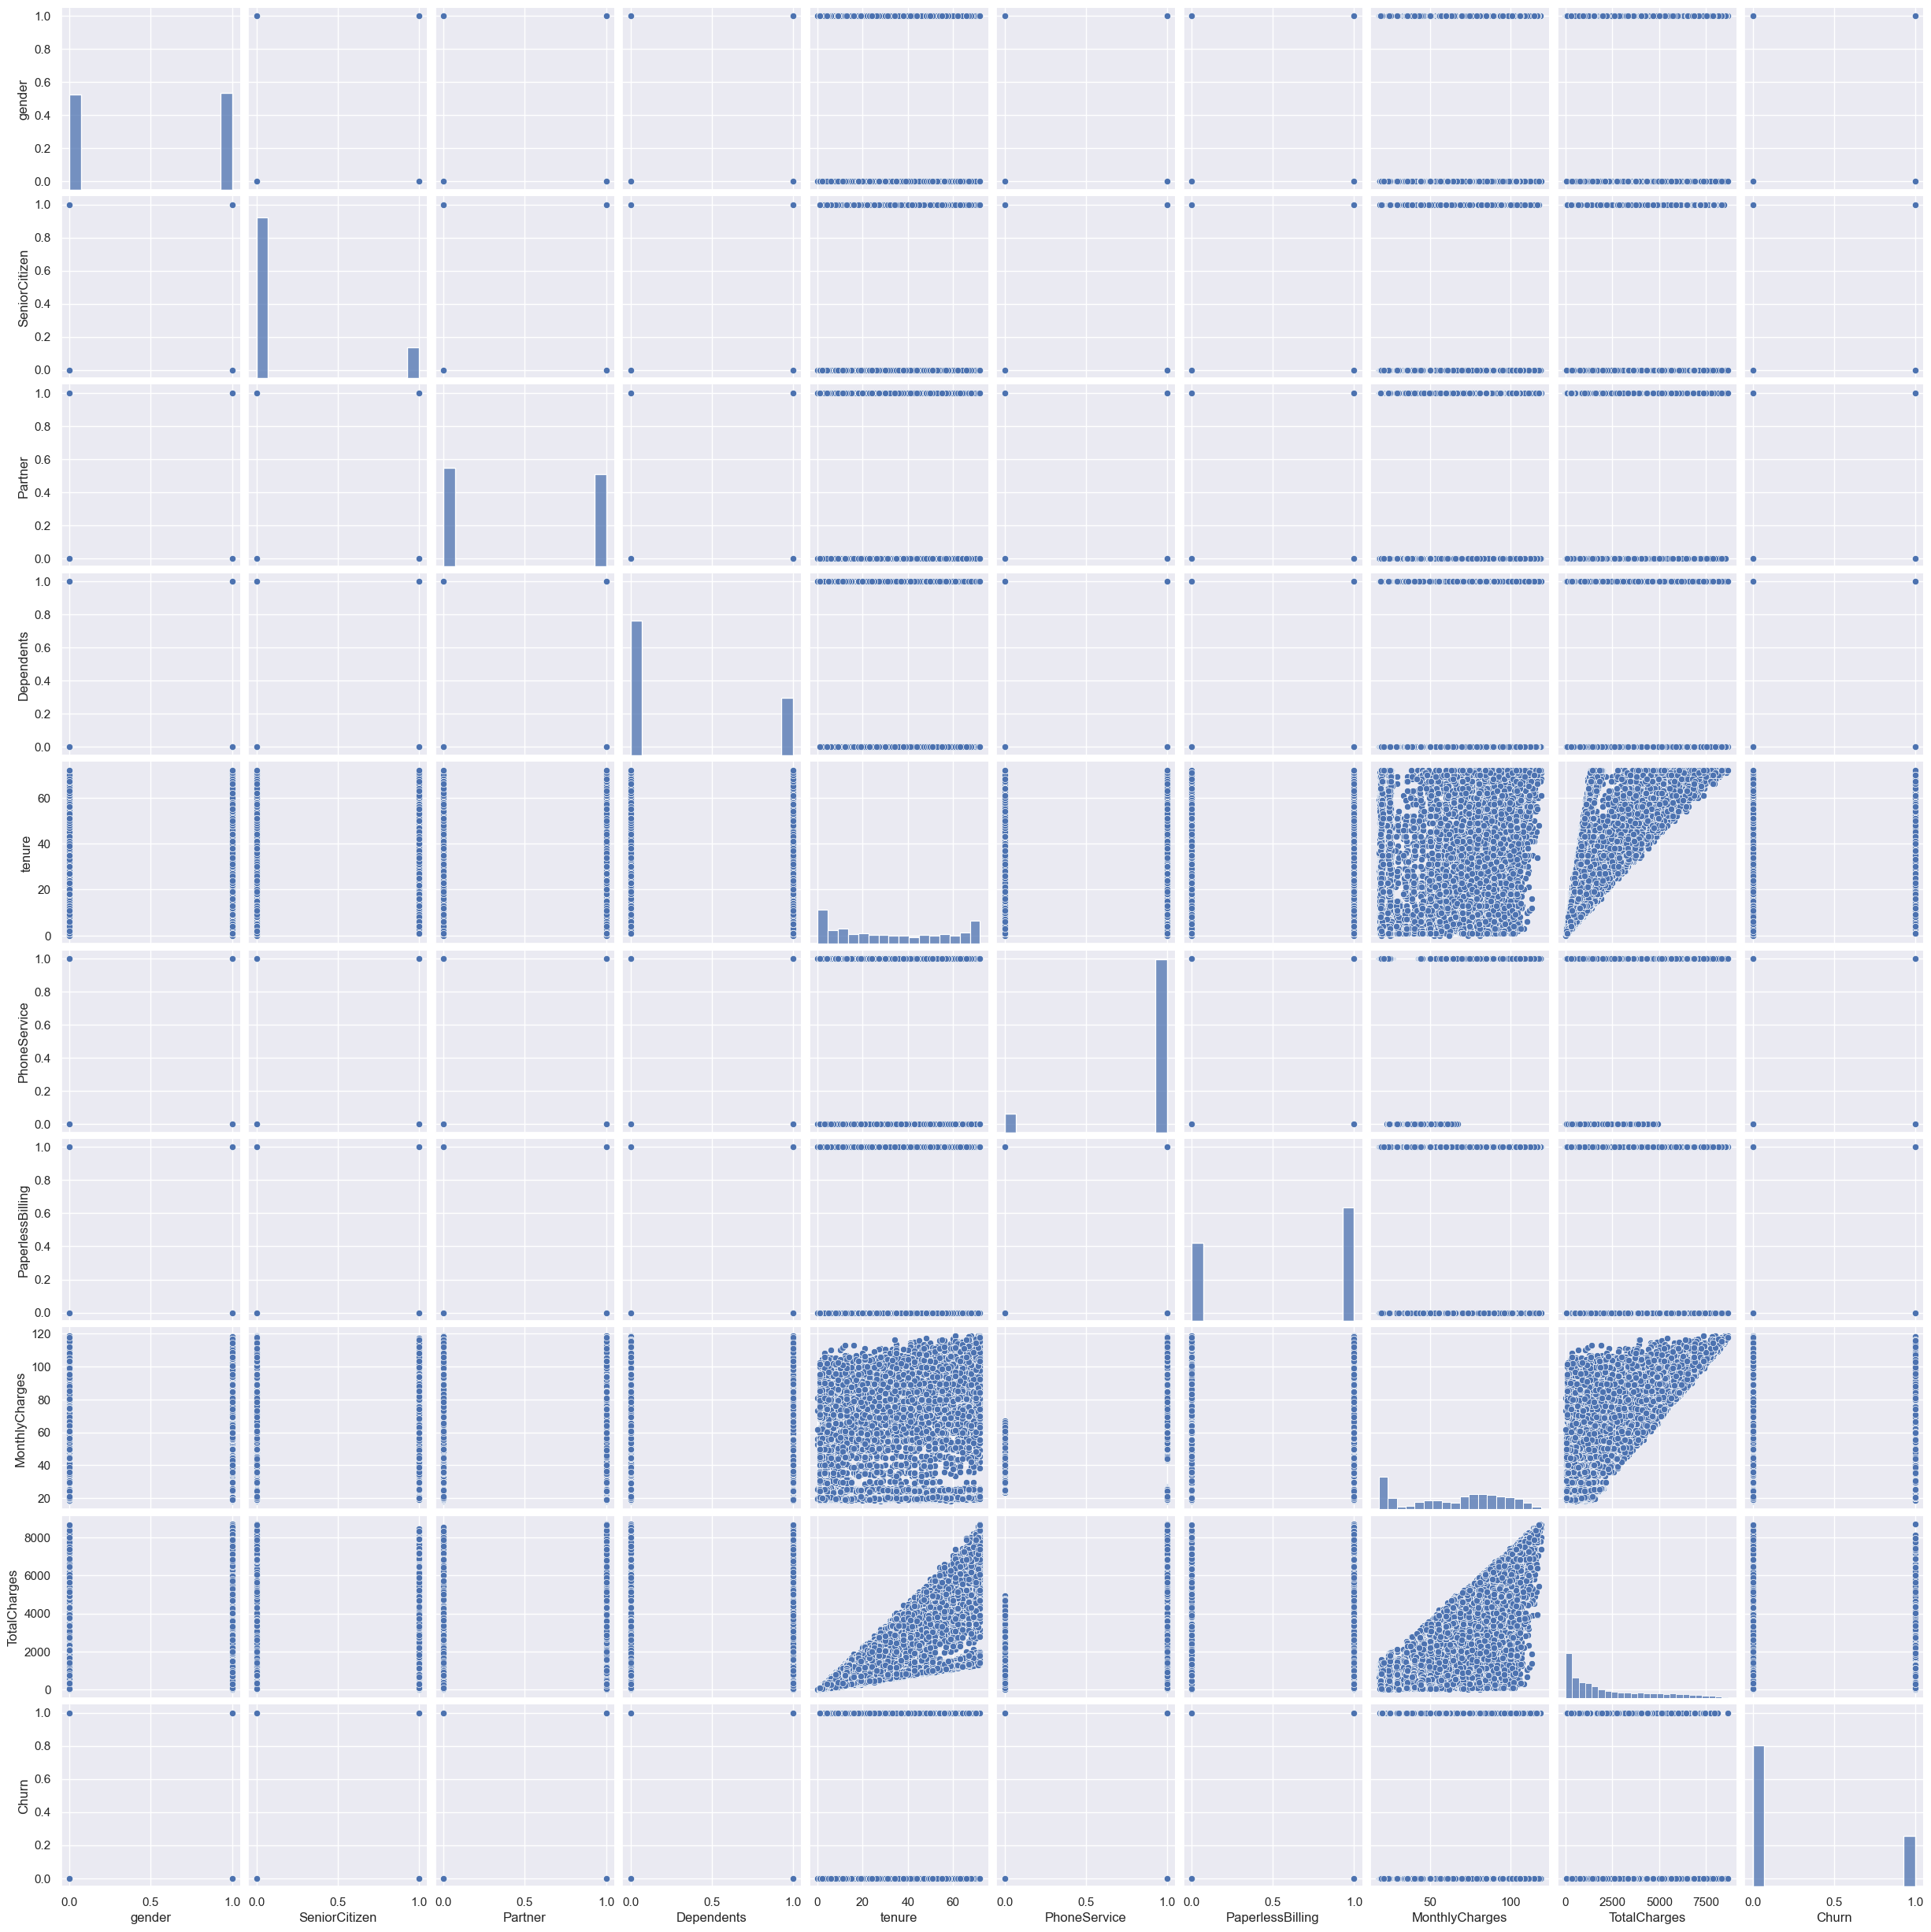

In [29]:
#  pair pllot for Categorical Variable

plt.figure(dpi=140)
sns.pairplot(df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling',
                'MonthlyCharges','TotalCharges','Churn']])
plt.show()

# Logistic Regression Model

In [30]:
# importing importent librabies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [31]:
# Dividing X and y

X = df.drop(columns =['Churn','customerID'])
y = df['Churn']

In [32]:
# split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Create logistic regression object

logreg = LogisticRegression()

In [35]:
# Train the model using the training sets

logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
#  Make predictions using the test set

y_pred = logreg.predict(X_test)

In [37]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8204400283889283
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

------------------------------
Confusion Matrix:
[[933 103]
 [150 223]]


In [38]:
#Cross-Validation using cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-Validation Accuracies:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Accuracies: [0.81011535 0.80922804 0.79769299 0.78881988 0.80373002]
Average Accuracy: 0.8019172546615371


In [39]:
# Hyperparameter Tuning on Logistic Regression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try
}

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Randomized Search
random_search = RandomizedSearchCV(logreg, param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy')

In [41]:
best_model = grid_search.best_estimator_  
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8183108587650816


# Random Forest Model

In [42]:
# importing the library

from sklearn.ensemble import RandomForestClassifier

In [43]:
# Creating Object

rfc = RandomForestClassifier()

In [44]:
# training the data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# making the Prediction

y_pred = rfc.predict(X_test)

In [46]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7927608232789212
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

------------------------------
Confusion Matrix:
[[940  96]
 [196 177]]


In [47]:
# Cross Validating the score

scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.7848769347881248


In [48]:
# Hyperparameter Tuning on Random Forest


param_grid = {
    'n_estimators': [10, 50, 100],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8026266310060975


# Decision Tree

In [49]:
#importing the library 

from sklearn.tree import DecisionTreeClassifier

In [50]:
# creating instance 

dt = DecisionTreeClassifier()

In [51]:
# training the data

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# making the prediction

y_pred = dt.predict(X_test)

In [53]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7068843151171044
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.45      0.46      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

------------------------------
Confusion Matrix:
[[826 210]
 [203 170]]


In [54]:
# Hyperparameter Tuning for decision Tree

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [55]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.7868304384075046


# Support Vector Classifier Model

In [56]:
# Importing library

from sklearn.svm import SVC

#Instance created
svc = SVC(kernel='rbf')

In [57]:
#training the data

svc.fit(X_train, y_train)

SVC()

In [58]:
# making the prediction

y_pred = svc.predict(X_test)

In [59]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8133427963094393
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409

------------------------------
Confusion Matrix:
[[946  90]
 [173 200]]


In [60]:
# Hyperparameter Tuning for SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.7962381461967751


# Feature selection

In [62]:
# Importing PCA library

from sklearn.decomposition import PCA

In [63]:
# creating instance

pca = PCA(n_components=2)

In [64]:
X_train_pca = pca.fit_transform(X_train)

In [65]:
X_test_pca = pca.transform(X_test)

In [66]:
# Building Logistic Regression model after Feature selection and training 

logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [79]:
# making prediction

y_pred = logreg.predict(X_test_pca)

In [80]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7672107877927609
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1036
           1       0.60      0.37      0.46       373

    accuracy                           0.77      1409
   macro avg       0.70      0.64      0.66      1409
weighted avg       0.75      0.77      0.75      1409

------------------------------
Confusion Matrix:
[[942  94]
 [234 139]]


In [69]:
# Feature Selection  using Select k best 

from sklearn.feature_selection import SelectKBest, f_classif

In [70]:
selector = SelectKBest(score_func=f_classif, k=5)

In [71]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [72]:
# After Feature selection making Random Forest Model 

rfc.fit(X_train_selected, y_train)

RandomForestClassifier()

In [81]:
y_pred = rfc.predict(X_test_selected)

In [82]:
# Model Accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print('-'*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('-'*30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7856635911994322
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

------------------------------
Confusion Matrix:
[[883 153]
 [149 224]]


In [83]:
# Get the feature names and their corresponding scores
feature_names = X.columns

In [84]:
scores = selector.scores_

In [85]:
feature_importances = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

In [86]:
print("Top 10 Features and their Scores:")
for feature, score in feature_importances[:10]:
    print(f"{feature}: {score}")

Top 10 Features and their Scores:
Contract_Month-to-month: 1077.8237280561789
tenure: 760.5416054145387
OnlineSecurity_No: 735.7249047293276
TechSupport_No: 697.3156644754736
InternetService_Fiber optic: 562.5571053376198
Contract_Two year: 556.3596824811989
PaymentMethod_Electronic check: 542.0560250122015
OnlineBackup_No: 423.01290608535203
DeviceProtection_No: 363.14641437536966
InternetService_No: 298.0887105212149


# Saving Model using Pickle


In [87]:
Import Pickle Library

import pickle

In [90]:
# # Save the model using pickle

with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)